In [1]:
pip install wordcloud


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score



In [3]:
df = pd.read_csv("twitter_training.csv")
df.sample(20)


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
42852,10151,PlayerUnknownsBattlegrounds(PUBG),Negative,You fools think banning gambling would increas...
67060,7083,johnson&johnson,Neutral,Got an internship rejection email today. Thank...
42691,10124,PlayerUnknownsBattlegrounds(PUBG),Positive,I love playing @ PUBG. So fun to be... Also so...
14578,2897,Dota2,Negative,arcade game.
31954,7484,LeagueOfLegends,Negative,I
13631,8739,NBA2K,Negative,@NBA2K worst 2k ever idc
17641,9825,PlayStation5(PS5),Positive,Just watched as
14902,2952,Dota2,Neutral,Making crappy personal til<unk> 3 day trial re...
41454,1513,Battlefield,Positive,Battlefield 4 is one of my favorite FPS
54590,2176,CallOfDuty,Negative,It’s the Oscars when this happens!


In [4]:
df.rename(columns={'im getting on borderlands and i will murder you all ,': 'text_data', 'Positive': 'sentiment'}, inplace=True)

print(df.head(5))

   2401  Borderlands sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                           text_data  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [5]:
df.columns

Index(['2401', 'Borderlands', 'sentiment', 'text_data'], dtype='object')

In [6]:
df.shape

(74681, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   2401         74681 non-null  int64 
 1   Borderlands  74681 non-null  object
 2   sentiment    74681 non-null  object
 3   text_data    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
df.dtypes

2401            int64
Borderlands    object
sentiment      object
text_data      object
dtype: object

In [9]:
np.sum(df.isnull().any(axis=1))

686

In [10]:

missing_ratio = df.isnull().mean() * 100

print("Missing Value Ratio:")
print(missing_ratio)


Missing Value Ratio:
2401           0.000000
Borderlands    0.000000
sentiment      0.000000
text_data      0.918574
dtype: float64


In [11]:
df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

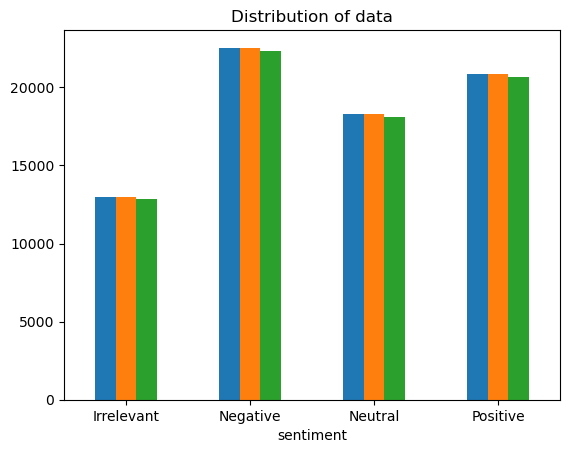

In [12]:

ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data', legend=False)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Irrelevant', 'Negative', 'Neutral', 'Positive'], rotation=0)

text, sentiment = list(df['text_data']), list(df['sentiment'])

In [13]:

sentiment_counts = df['sentiment'].value_counts()

print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: sentiment, dtype: int64


<Axes: xlabel='sentiment', ylabel='count'>

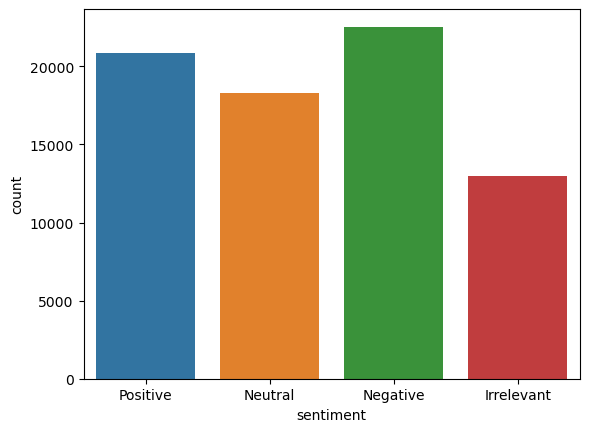

In [14]:
import seaborn as sns
sns.countplot(x='sentiment', data=df)

In [15]:
data=df[['text_data','sentiment']]

In [16]:
data['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [17]:

data_pos = data[data['sentiment'] == "Positive" ]
data_neg = data[data['sentiment'] == "Negative" ]
data_neutral = data[data['sentiment'] == "Neutral"]  
data_irrelevant = data[data['sentiment'] == "Irrelevant"]  

count_pos = len(data_pos)
count_neg = len(data_neg)
count_neutral = len(data_neutral)
count_irrelevant = len(data_irrelevant)

print("Positive count:", count_pos)
print("Negative count:", count_neg)
print("Neutral count:", count_neutral)
print("Irrelevant count:", count_irrelevant)


Positive count: 20831
Negative count: 22542
Neutral count: 18318
Irrelevant count: 12990


In [18]:
import pandas as pd

dataset = pd.concat([data_pos, data_neg, data_neutral, data_irrelevant], ignore_index=True)

print(dataset.head(10))


                                           text_data sentiment
0  I am coming to the borders and I will kill you...  Positive
1  im getting on borderlands and i will kill you ...  Positive
2  im coming on borderlands and i will murder you...  Positive
3  im getting on borderlands 2 and i will murder ...  Positive
4  im getting into borderlands and i can murder y...  Positive
5  So I spent a few hours making something for fu...  Positive
6  So I spent a couple of hours doing something f...  Positive
7  So I spent a few hours doing something for fun...  Positive
8  So I spent a few hours making something for fu...  Positive
9  2010 So I spent a few hours making something f...  Positive


In [19]:
dataset['text_data']=dataset['text_data'].str.lower()
dataset['text_data'].head()


0    i am coming to the borders and i will kill you...
1    im getting on borderlands and i will kill you ...
2    im coming on borderlands and i will murder you...
3    im getting on borderlands 2 and i will murder ...
4    im getting into borderlands and i can murder y...
Name: text_data, dtype: object

In [20]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']


In [21]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text_data'] = dataset['text_data'].apply(lambda text: cleaning_stopwords(text))
dataset['text_data'].head()


0                coming borders kill all,
1        im getting borderlands kill all,
2       im coming borderlands murder all,
3    im getting borderlands 2 murder all,
4      im getting borderlands murder all,
Name: text_data, dtype: object

In [22]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text_data']= dataset['text_data'].apply(lambda x: cleaning_punctuations(x))
dataset['text_data'].tail()


74676    based last quarters earnings lets see well nex...
74677    lets see well handle next one supply chains he...
74678    good them stuff based earnings last quarter le...
74679    9 good idea them based earnings last quarter l...
74680    goes them based earnings first quarter cans se...
Name: text_data, dtype: object

In [23]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text_data'] = dataset['text_data'].apply(lambda x: cleaning_URLs(x))
dataset['text_data'].tail()


74676    based last quarters earnings lets see well nex...
74677    lets see well handle next one supply chains he...
74678    good them stuff based earnings last quarter le...
74679    9 good idea them based earnings last quarter l...
74680    goes them based earnings first quarter cans se...
Name: text_data, dtype: object

In [24]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text_data'] = dataset['text_data'].apply(lambda x: cleaning_numbers(x))
dataset['text_data'].tail()


74676    based last quarters earnings lets see well nex...
74677    lets see well handle next one supply chains he...
74678    good them stuff based earnings last quarter le...
74679     good idea them based earnings last quarter le...
74680    goes them based earnings first quarter cans se...
Name: text_data, dtype: object

In [25]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

dataset['text_data'] = dataset['text_data'].apply(tokenizer.tokenize)

print(dataset['text_data'].head())

0               [coming, borders, kill, all]
1      [im, getting, borderlands, kill, all]
2     [im, coming, borderlands, murder, all]
3    [im, getting, borderlands, murder, all]
4    [im, getting, borderlands, murder, all]
Name: text_data, dtype: object


In [26]:
import nltk
from nltk.stem import PorterStemmer


st = PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text 

dataset['text_data'] = dataset['text_data'].apply(lambda x: stemming_on_text(x))
print(dataset['text_data'].head())

0              [come, border, kill, all]
1       [im, get, borderland, kill, all]
2    [im, come, borderland, murder, all]
3     [im, get, borderland, murder, all]
4     [im, get, borderland, murder, all]
Name: text_data, dtype: object


In [27]:
import nltk


nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text

dataset['text_data'] = dataset['text_data'].apply(lambda x: lemmatizer_on_text(x))

print(dataset['text_data'].head())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0              [come, border, kill, all]
1       [im, get, borderland, kill, all]
2    [im, come, borderland, murder, all]
3     [im, get, borderland, murder, all]
4     [im, get, borderland, murder, all]
Name: text_data, dtype: object


In [28]:
X=dataset.text_data
y=dataset.sentiment

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
X_train.fillna('', inplace=True)

In [31]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

X_train_flattened = [item for sublist in X_train for item in sublist]
vectoriser.fit(X_train_flattened)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  29172


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer


X_train_preprocessed = [text.lower() if isinstance(text, str) else str(text) for text in X_train]
X_test_preprocessed = [text.lower() if isinstance(text, str) else str(text) for text in X_test]

vectorizer = TfidfVectorizer()


vectorizer.fit(X_train_preprocessed)
X_train_vectorized = vectorizer.transform(X_train_preprocessed)
X_test_vectorized = vectorizer.transform(X_test_preprocessed)

print("X_train_vectorized shape:", X_train_vectorized.shape)
print("y_train shape:", len(y_train))

X_train_vectorized shape: (59744, 29172)
y_train shape: 59744


In [33]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train_vectorized, y_train)

y_pred = BNBmodel.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6985338421369753


Accuracy: 0.6985338421369753

F1 Score: 0.6938488268157276

Confusion Matrix:
[[1296  470   64  759]
 [  51 3516  119  779]
 [ 112  548 2003 1070]
 [  56  379   96 3619]]

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.86      0.50      0.63      2589
    Negative       0.72      0.79      0.75      4465
     Neutral       0.88      0.54      0.67      3733
    Positive       0.58      0.87      0.70      4150

    accuracy                           0.70     14937
   macro avg       0.76      0.67      0.69     14937
weighted avg       0.74      0.70      0.69     14937



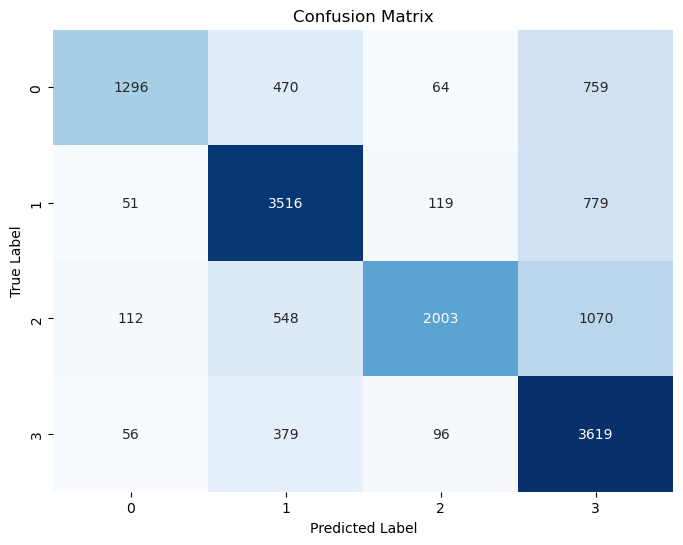

In [34]:

y_pred = BNBmodel.predict(X_test_vectorized)  


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


f1 = f1_score(y_test, y_pred, average='weighted')
print("\nF1 Score:", f1)


conf_matrix = confusion_matrix(y_test, y_pred)


print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

SVCmodel = LinearSVC(dual=False)  
SVCmodel.fit(X_train_vectorized, y_train)

y_pred = SVCmodel.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8243288478275423


Accuracy: 0.8243288478275423

F1 Score: 0.8242395413703074

Confusion Matrix:
[[1999  207  162  221]
 [  87 3823  305  250]
 [ 110  278 3026  319]
 [ 100  274  311 3465]]

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.87      0.77      0.82      2589
    Negative       0.83      0.86      0.85      4465
     Neutral       0.80      0.81      0.80      3733
    Positive       0.81      0.83      0.82      4150

    accuracy                           0.82     14937
   macro avg       0.83      0.82      0.82     14937
weighted avg       0.83      0.82      0.82     14937



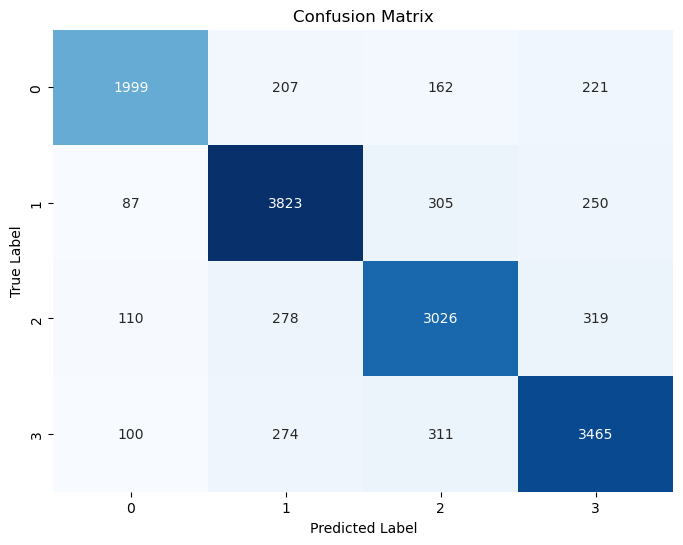

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

SVCmodel = LinearSVC(dual=False)  
SVCmodel.fit(X_train_vectorized, y_train)

y_pred = SVCmodel.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')
print("\nF1 Score:", f1)


conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

LRmodel = LogisticRegression(multi_class='ovr',C=2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train_vectorized, y_train)  
y_pred = LRmodel.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)




Accuracy: 0.7637410457253799



Accuracy: 0.7637410457253799

 F1 Score: 0.7626927767204992
Confusion Matrix:
[[1694  316  235  344]
 [ 112 3684  375  294]
 [ 144  415 2742  432]
 [ 124  353  385 3288]]
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.82      0.65      0.73      2589
    Negative       0.77      0.83      0.80      4465
     Neutral       0.73      0.73      0.73      3733
    Positive       0.75      0.79      0.77      4150

    accuracy                           0.76     14937
   macro avg       0.77      0.75      0.76     14937
weighted avg       0.77      0.76      0.76     14937



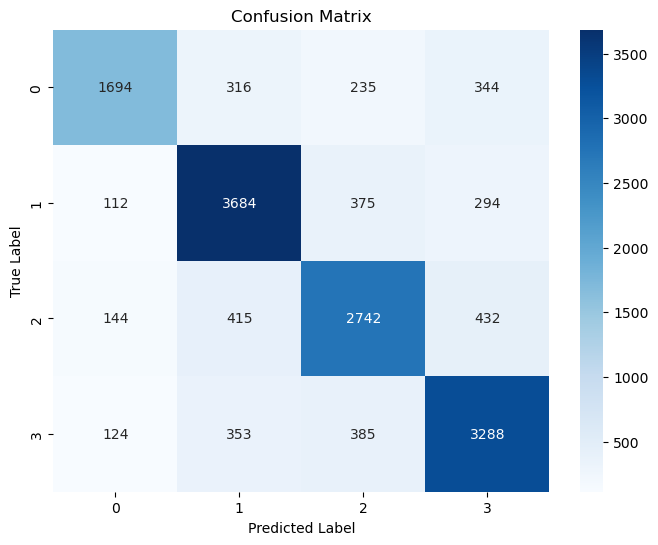

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

import seaborn as sns

y_pred = LRmodel.predict(X_test_vectorized)


conf_matrix = confusion_matrix(y_test, y_pred)

y_pred = LRmodel.predict(X_test_vectorized)  

conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
print("\nAccuracy:", accuracy)
print("\n F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


print("Classification Report:")
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
